## Import packages

In [281]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer,f1_score, accuracy_score,precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import auc, roc_curve, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import h2o
from h2o.frame import H2OFrame
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

## Load Dataset

In [336]:
data1 = pd.read_csv('merge_stock_news_amazon.csv')
data2 = pd.read_csv('merge_stock_news_tesla.csv')
data1.loc[:,'ticker'] = 'amazon'
data2.loc[:,'ticker'] = 'tesla'
data = data1.append(data2)
#change the type of Date to Datetime
data['Date'] =pd.to_datetime(data.Date)
data = data.sort_values('Date')
data.head()

,Date,Weekday,Yesterday_pos,Yesterday_neg,Yesterday_neu,Positive,Negative,Neutral,Yesterday_price_change,Price_change,Yesterday_open,Yesterday_close,Yesterday_volume,Yesterday_high,Yesterday_low,Yesterday_Adj_close,ticker
0,2017-01-04,Wednesday,0.049412,0.063187,0.887401,0.780477,0.022030,0.197493,NaN,1.0,37.896000,37.683498,70422000,37.938000,37.384998,37.683498,amazon
0,2017-01-04,Wednesday,0.928379,0.046862,0.024759,0.393108,0.208913,0.397980,NaN,1.0,42.972000,43.397999,29616500,44.066002,42.192001,43.397999,tesla
1,2017-01-05,Thursday,0.393108,0.208913,0.397980,0.575796,0.009905,0.414299,1.0,0.0,42.950001,45.397999,56067500,45.599998,42.862000,45.397999,tesla
1,2017-01-05,Thursday,0.780477,0.022030,0.197493,0.139866,0.011890,0.848244,1.0,1.0,37.919498,37.859001,50210000,37.984001,37.709999,37.859001,amazon
2,2017-01-06,Friday,0.139866,0.011890,0.848244,0.030243,0.109478,0.860278,1.0,1.0,38.077499,39.022499,116602000,39.119999,38.013000,39.022499,amazon


In [326]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2314 entries, 0 to 1153
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    2314 non-null   datetime64[ns]
 1   Weekday                 2314 non-null   object        
 2   Yesterday_pos           2314 non-null   float64       
 3   Yesterday_neg           2314 non-null   float64       
 4   Yesterday_neu           2314 non-null   float64       
 5   Positive                2017 non-null   float64       
 6   Negative                2017 non-null   float64       
 7   Neutral                 2017 non-null   float64       
 8   Yesterday_price_change  1804 non-null   float64       
 9   Price_change            1820 non-null   float64       
 10  Yesterday_open          2314 non-null   float64       
 11  Yesterday_close         2314 non-null   float64       
 12  Yesterday_volume        2314 non-null   int64   

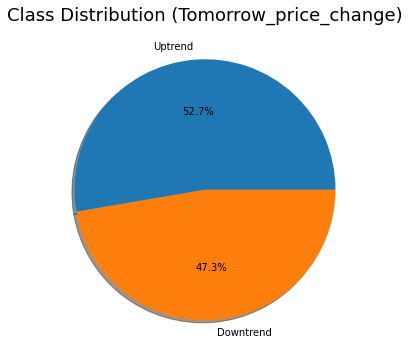

,Yesterday_pos,Yesterday_neg,Yesterday_neu,Positive,Negative,Neutral,Yesterday_price_change,Price_change,Yesterday_open,Yesterday_close,Yesterday_volume,Yesterday_high,Yesterday_low,Yesterday_Adj_close
count,2314.000000,2314.000000,2314.000000,2017.000000,2017.000000,2017.000000,1804.000000,1820.000000,2314.000000,2314.000000,2.314000e+03,2314.000000,2314.000000,2314.000000
mean,0.214772,0.165519,0.619708,0.205400,0.160232,0.634368,0.529933,0.526923,184.765922,184.881556,6.556393e+07,188.203057,181.121400,184.881556
std,0.197755,0.206642,0.242755,0.192748,0.209106,0.242648,0.499242,0.499412,231.839385,232.059054,4.189189e+07,237.046786,226.266364,232.059054
min,0.008329,0.006417,0.017054,0.008167,0.006458,0.013849,0.000000,0.000000,36.220001,35.793999,9.800600e+06,37.335999,35.397999,35.793999
25%,0.061813,0.019558,0.463314,0.060151,0.019186,0.478259,0.000000,0.000000,62.273125,62.251000,3.514312e+07,63.262499,61.099998,62.251000
50%,0.142526,0.050892,0.640360,0.132814,0.044060,0.659418,1.000000,1.000000,88.411499,88.327751,5.664000e+07,89.311497,87.347752,88.327751
75%,0.319562,0.278512,0.841784,0.301586,0.264215,0.852476,1.000000,1.000000,164.995880,164.699623,8.475700e+07,166.553123,163.034630,164.699623
max,0.954498,0.968855,0.949012,0.953572,0.970968,0.951259,1.000000,1.000000,1234.410034,1229.910034,3.313000e+08,1243.489990,1217.000000,1229.910034


In [327]:
#only process data from last three years
#data = data[data.Date >= '2019-1-1']
#drop two rows with Null values
uptrend = len(data[data['Price_change']==1])
downtrend = len(data[data['Price_change']==0])

fig, ax = plt.subplots(figsize=(6,6))
plt.pie(x=[uptrend, downtrend], labels=['Uptrend','Downtrend'], shadow=True, autopct='%1.1f%%')
plt.title('Class Distribution (Tomorrow_price_change)', fontsize=18)
plt.show()
data.describe()

## Drop/add features

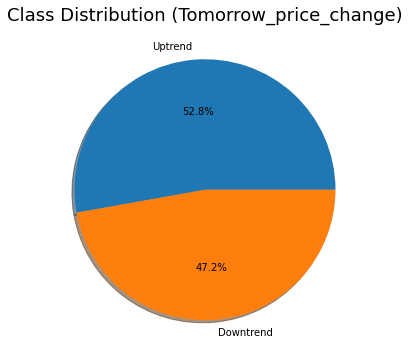

,Yesterday_pos,Yesterday_neg,Yesterday_neu,Positive,Negative,Neutral,Yesterday_price_change,Price_change,Yesterday_open,Yesterday_close,Yesterday_volume,Yesterday_high,Yesterday_low,Yesterday_Adj_close
count,2314.000000,2314.000000,2314.000000,2017.000000,2017.000000,2017.000000,1804.000000,1820.000000,2314.000000,2314.000000,2.314000e+03,2314.000000,2314.000000,2314.000000
mean,0.214772,0.165519,0.619708,0.205400,0.160232,0.634368,0.529933,0.526923,184.765922,184.881556,6.556393e+07,188.203057,181.121400,184.881556
std,0.197755,0.206642,0.242755,0.192748,0.209106,0.242648,0.499242,0.499412,231.839385,232.059054,4.189189e+07,237.046786,226.266364,232.059054
min,0.008329,0.006417,0.017054,0.008167,0.006458,0.013849,0.000000,0.000000,36.220001,35.793999,9.800600e+06,37.335999,35.397999,35.793999
25%,0.061813,0.019558,0.463314,0.060151,0.019186,0.478259,0.000000,0.000000,62.273125,62.251000,3.514312e+07,63.262499,61.099998,62.251000
50%,0.142526,0.050892,0.640360,0.132814,0.044060,0.659418,1.000000,1.000000,88.411499,88.327751,5.664000e+07,89.311497,87.347752,88.327751
75%,0.319562,0.278512,0.841784,0.301586,0.264215,0.852476,1.000000,1.000000,164.995880,164.699623,8.475700e+07,166.553123,163.034630,164.699623
max,0.954498,0.968855,0.949012,0.953572,0.970968,0.951259,1.000000,1.000000,1234.410034,1229.910034,3.313000e+08,1243.489990,1217.000000,1229.910034


In [328]:
#drop features based on EDA (see EDA.ipynb)
cols = ['Date','ticker','Weekday','Price_change','Positive', \
        'Negative', 'Neutral','Yesterday_pos','Yesterday_neg','Yesterday_neu']
df = data[cols]
df = df.dropna()
uptrend = len(df[df['Price_change']==1])
downtrend = len(df[df['Price_change']==0])

fig, ax = plt.subplots(figsize=(6,6))
plt.pie(x=[uptrend, downtrend], labels=['Uptrend','Downtrend'], shadow=True, autopct='%1.1f%%')
plt.title('Class Distribution (Tomorrow_price_change)', fontsize=18)
plt.show()
data.describe()

In [329]:
# one-hot encoding 
one_hot_encoding_columns = ['ticker','Weekday']

# encode categorical variables with more than two levels using one-hot encoding
df_transformed = pd.get_dummies(df, columns = one_hot_encoding_columns)
df_transformed

,Date,Price_change,Positive,Negative,Neutral,Yesterday_pos,Yesterday_neg,Yesterday_neu,ticker_amazon,ticker_tesla,Weekday_Friday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,2017-01-04,1.0,0.780477,0.022030,0.197493,0.049412,0.063187,0.887401,1,0,0,0,0,1
0,2017-01-04,1.0,0.393108,0.208913,0.397980,0.928379,0.046862,0.024759,0,1,0,0,0,1
1,2017-01-05,0.0,0.575796,0.009905,0.414299,0.393108,0.208913,0.397980,0,1,0,1,0,0
1,2017-01-05,1.0,0.139866,0.011890,0.848244,0.780477,0.022030,0.197493,1,0,0,1,0,0
2,2017-01-06,1.0,0.030243,0.109478,0.860278,0.139866,0.011890,0.848244,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,2021-12-29,0.0,0.173104,0.098132,0.728764,0.034733,0.030352,0.934915,1,0,0,0,0,1
1157,2021-12-30,0.0,0.093781,0.122157,0.784062,0.173104,0.098132,0.728764,1,0,0,1,0,0
1151,2021-12-30,0.0,0.015909,0.918772,0.065319,0.045196,0.112442,0.842363,0,1,0,1,0,0
1158,2021-12-31,0.0,0.038626,0.022023,0.939351,0.093781,0.122157,0.784062,1,0,1,0,0,0


In [330]:
# Input features and labels
X = np.array(df_transformed[['Positive', 'Negative', 'Neutral','ticker_amazon', 'ticker_tesla',\
                            'Yesterday_pos','Yesterday_neg','Yesterday_neu','Weekday_Thursday',\
                            'Weekday_Tuesday','Weekday_Wednesday','Weekday_Tuesday']])
y = np.array(df_transformed['Price_change'])

# train-test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,  shuffle=True)
#sm = SMOTE(random_state=42)
#X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


## Evaluation metrics for cross validation

In [331]:
#Evaluation metrics
scoring = {'accuracy' : make_scorer(accuracy_score, greater_is_better=True), 
           'f1_macro' : make_scorer(f1_score, average='macro', greater_is_better=True),
           'precision' : make_scorer(precision_score, zero_division=0),
           'recall' : make_scorer(recall_score, average='macro')  }

## Naive Bayes

Training Naive Bayes model with cross validation:

Mean accs :  0.5243296625486796
Mean f1_macro 0.5238995482446438
Mean precision 0.550779991773634
Mean recall 0.525219185533989
------------------------------------------------------------------------------------------


Testing results:


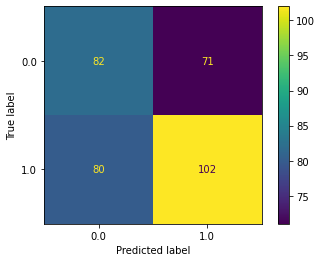

              precision    recall  f1-score   support

         0.0       0.51      0.54      0.52       153
         1.0       0.59      0.56      0.57       182

    accuracy                           0.55       335
   macro avg       0.55      0.55      0.55       335
weighted avg       0.55      0.55      0.55       335



In [332]:
nb = GaussianNB()
nb.fit(X_train, y_train)

print("Training Naive Bayes model with cross validation:\n")

# 5 fold cross validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
cv_scores = cross_validate(nb, X_train, y_train, cv=cv, scoring=scoring)
accs = cv_scores['test_accuracy'].mean()
print("Mean accs : ",accs)
f1_macros = cv_scores['test_f1_macro'].mean()
print("Mean f1_macro", f1_macros)
prec = cv_scores['test_precision'].mean()
print("Mean precision", prec)
recall = cv_scores['test_recall'].mean()
print("Mean recall", recall)
print("---------"*10)
print("\n")
print("Testing results:")
predictions = nb.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=nb.classes_)
disp.plot()
plt.show()
print(classification_report(y_test, nb.predict(X_test)))

##  Naive Bayes with feature transformation

Mean accs :  0.5213352712094956
Mean f1_macro 0.5208177185121416
Mean precision 0.5475812786600873
Mean recall 0.522077781334514
------------------------------------------------------------------------------------------


Testing results:


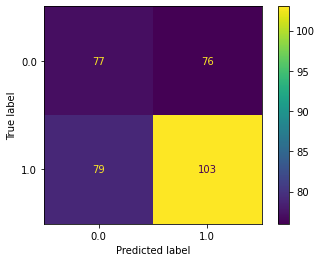

              precision    recall  f1-score   support

         0.0       0.49      0.50      0.50       153
         1.0       0.58      0.57      0.57       182

    accuracy                           0.54       335
   macro avg       0.53      0.53      0.53       335
weighted avg       0.54      0.54      0.54       335



In [333]:
trans = KBinsDiscretizer(n_bins=12, encode='ordinal', strategy='uniform')
model = GaussianNB()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])

#nb = GaussianNB()
pipeline.fit(X_train, y_train)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
cv_scores = cross_validate(pipeline, X_train, y_train, cv=cv, scoring=scoring)
accs = cv_scores['test_accuracy'].mean()
print("Mean accs : ",accs)
f1_macros = cv_scores['test_f1_macro'].mean()
print("Mean f1_macro", f1_macros)
prec = cv_scores['test_precision'].mean()
print("Mean precision", prec)
recall = cv_scores['test_recall'].mean()
print("Mean recall", recall)
print("---------"*10)
print("\n")
print("Testing results:")
predictions = pipeline.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=pipeline.classes_)
disp.plot()
plt.show()
print(classification_report(y_test, pipeline.predict(X_test)))

## SVM

------------------------------------------------------------------------------------------
Training SVM with kernel rbf with cross validation
Mean accs :  0.5213352712094956
Mean f1_macro 0.5208177185121416
Mean precision 0.5475812786600873
Mean recall 0.522077781334514


Testing results:


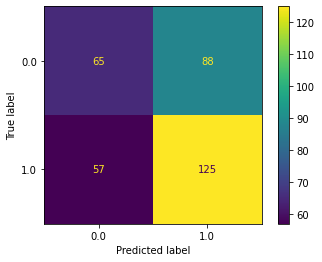

              precision    recall  f1-score   support

         0.0       0.53      0.42      0.47       153
         1.0       0.59      0.69      0.63       182

    accuracy                           0.57       335
   macro avg       0.56      0.56      0.55       335
weighted avg       0.56      0.57      0.56       335

------------------------------------------------------------------------------------------
Training SVM with kernel poly with cross validation
Mean accs :  0.5213352712094956
Mean f1_macro 0.5208177185121416
Mean precision 0.5475812786600873
Mean recall 0.522077781334514


Testing results:


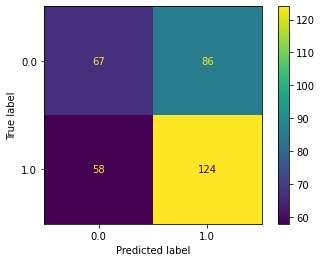

              precision    recall  f1-score   support

         0.0       0.54      0.44      0.48       153
         1.0       0.59      0.68      0.63       182

    accuracy                           0.57       335
   macro avg       0.56      0.56      0.56       335
weighted avg       0.57      0.57      0.56       335

------------------------------------------------------------------------------------------
Training SVM with kernel sigmoid with cross validation
Mean accs :  0.5213352712094956
Mean f1_macro 0.5208177185121416
Mean precision 0.5475812786600873
Mean recall 0.522077781334514


Testing results:


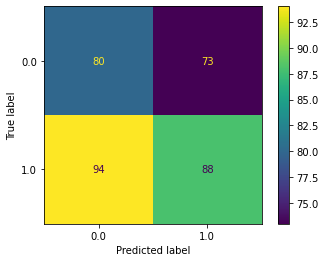

              precision    recall  f1-score   support

         0.0       0.46      0.52      0.49       153
         1.0       0.55      0.48      0.51       182

    accuracy                           0.50       335
   macro avg       0.50      0.50      0.50       335
weighted avg       0.51      0.50      0.50       335

------------------------------------------------------------------------------------------
Training SVM with kernel linear with cross validation
Mean accs :  0.5213352712094956
Mean f1_macro 0.5208177185121416
Mean precision 0.5475812786600873
Mean recall 0.522077781334514


Testing results:


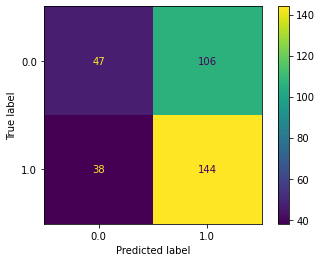

              precision    recall  f1-score   support

         0.0       0.55      0.31      0.39       153
         1.0       0.58      0.79      0.67       182

    accuracy                           0.57       335
   macro avg       0.56      0.55      0.53       335
weighted avg       0.57      0.57      0.54       335



In [334]:
for kernel in {'linear', 'poly', 'rbf', 'sigmoid'}:
    print("---------"*10)
    print("Training SVM with kernel {} with cross validation".format(kernel))
    
    
    model = svm.SVC(kernel=kernel, probability=True)
    model.fit(X_train, y_train)

    
    # 5 fold cross validation
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    cv_scores = cross_validate(pipeline, X_train, y_train, cv=cv, scoring=scoring)
    accs = cv_scores['test_accuracy'].mean()
    print("Mean accs : ",accs)
    f1_macros = cv_scores['test_f1_macro'].mean()
    print("Mean f1_macro", f1_macros)
    prec = cv_scores['test_precision'].mean()
    print("Mean precision", prec)
    recall = cv_scores['test_recall'].mean()
    print("Mean recall", recall)
 
    print("\n")
    print("Testing results:")
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
    disp.plot()
    plt.show()
    print(classification_report(y_test, model.predict(X_test)))

## SVM with feature transformation

------------------------------------------------------------------------------------------
Training SVM with kernel rbf with cross validation
Mean accs :  0.5532319675033075
Mean f1_macro 0.5406472600362471
Mean precision 0.5611130994205736
Mean recall 0.5467094318496092


Testing results:


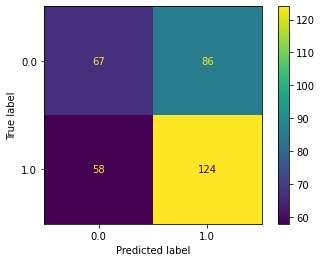

              precision    recall  f1-score   support

         0.0       0.54      0.44      0.48       153
         1.0       0.59      0.68      0.63       182

    accuracy                           0.57       335
   macro avg       0.56      0.56      0.56       335
weighted avg       0.57      0.57      0.56       335

------------------------------------------------------------------------------------------
Training SVM with kernel poly with cross validation
Mean accs :  0.542511226638344
Mean f1_macro 0.5318132404739138
Mean precision 0.5543932417192248
Mean recall 0.5367786357157482


Testing results:


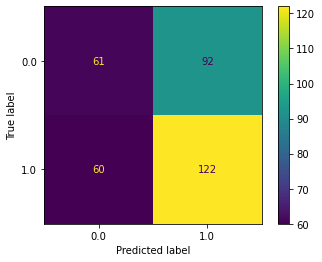

              precision    recall  f1-score   support

         0.0       0.50      0.40      0.45       153
         1.0       0.57      0.67      0.62       182

    accuracy                           0.55       335
   macro avg       0.54      0.53      0.53       335
weighted avg       0.54      0.55      0.54       335

------------------------------------------------------------------------------------------
Training SVM with kernel sigmoid with cross validation
Mean accs :  0.4976298283861592
Mean f1_macro 0.4962124363695898
Mean precision 0.5211581837151195
Mean recall 0.4967776912693094


Testing results:


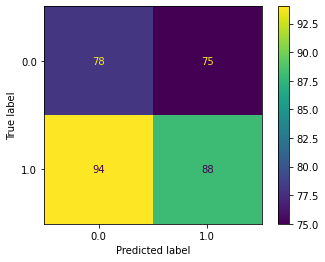

              precision    recall  f1-score   support

         0.0       0.45      0.51      0.48       153
         1.0       0.54      0.48      0.51       182

    accuracy                           0.50       335
   macro avg       0.50      0.50      0.50       335
weighted avg       0.50      0.50      0.50       335

------------------------------------------------------------------------------------------
Training SVM with kernel linear with cross validation
Mean accs :  0.5357976037415917
Mean f1_macro 0.5089833683938596
Mean precision 0.5437374877960796
Mean recall 0.5269941070364874


Testing results:


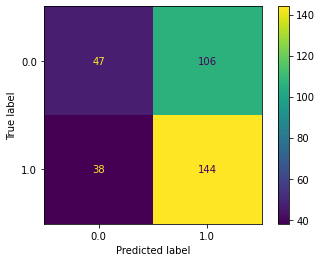

              precision    recall  f1-score   support

         0.0       0.55      0.31      0.39       153
         1.0       0.58      0.79      0.67       182

    accuracy                           0.57       335
   macro avg       0.56      0.55      0.53       335
weighted avg       0.57      0.57      0.54       335



In [335]:
for kernel in {'linear', 'poly', 'rbf', 'sigmoid'}:
    print("---------"*10)
    print("Training SVM with kernel {} with cross validation".format(kernel))
    
    trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
    model = svm.SVC(kernel=kernel, probability=True)
    pipeline = Pipeline(steps=[('t', trans), ('m', model)])

    pipeline.fit(X_train, y_train)

    
    # 10 fold cross validation
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    cv_scores = cross_validate(pipeline, X_train, y_train, cv=cv, scoring=scoring)
    accs = cv_scores['test_accuracy'].mean()
    print("Mean accs : ",accs)
    f1_macros = cv_scores['test_f1_macro'].mean()
    print("Mean f1_macro", f1_macros)
    prec = cv_scores['test_precision'].mean()
    print("Mean precision", prec)
    recall = cv_scores['test_recall'].mean()
    print("Mean recall", recall)
 
    print("\n")
    print("Testing results:")
    predictions = pipeline.predict(X_test)
    cm = confusion_matrix(y_test, predictions, labels=pipeline.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=pipeline.classes_)
    disp.plot()
    plt.show()
    print(classification_report(y_test, pipeline.predict(X_test)))

## Random Forest

In [343]:
# Initialize H2O cluster
h2o.init()
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.13" 2021-10-19; OpenJDK Runtime Environment JBR-11.0.13.7-1751.21-jcef (build 11.0.13+7-b1751.21); OpenJDK 64-Bit Server VM JBR-11.0.13.7-1751.21-jcef (build 11.0.13+7-b1751.21, mixed mode)
  Starting server from /home/nankli/anaconda3/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp2d3j_1fv
  JVM stdout: /tmp/tmp2d3j_1fv/h2o_nankli_started_from_python.out
  JVM stderr: /tmp/tmp2d3j_1fv/h2o_nankli_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,2 years and 20 days !!!
H2O_cluster_name:,H2O_from_python_nankli_dl4zdi
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.859 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [344]:
# Transform to H2O Frame, and make sure the target variable is categorical
data = data.dropna()
cols = ['Date','ticker','Weekday','Price_change','Positive', \
        'Negative', 'Neutral','Yesterday_pos','Yesterday_neg','Yesterday_neu']
df = data[cols]
h2o_df = H2OFrame(df)

h2o_df['Price_change'] = h2o_df['Price_change'].asfactor()
h2o_df.summary()

Parse progress: |█████████████████████████████████████████████████████████| 100%


,Date,ticker,Weekday,Price_change,Positive,Negative,Neutral,Yesterday_pos,Yesterday_neg,Yesterday_neu
type,time,enum,enum,enum,real,real,real,real,real,real
mins,1483574400000.0,,,,0.0088244136422872,0.0065059675835072,0.0170535948127508,0.0087496237829327,0.0072710742242634,0.0170535948127508
mean,1564669082975.2063,,,,0.21042903470629745,0.1681793423868221,0.6213916225580651,0.21434093233256912,0.16329152654402987,0.6223675402239361
maxs,1640908800000.0,,,,0.952995538711548,0.96885484457016,0.9479892253875732,0.952995538711548,0.96885484457016,0.9490119814872742
sigma,46914411413.53404,,,,0.19387028747329074,0.2071627208083104,0.23919763391179186,0.19124815317542926,0.20237527830701646,0.23943394521904343
zeros,0,,,,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0
0,2017-01-05 00:00:00,tesla,Thursday,0,0.5757962688803673,0.0099048539996147,0.4142988603562116,0.3931075353175401,0.2089127439539879,0.3979797307401895
1,2017-01-05 00:00:00,amazon,Thursday,1,0.1398663073778152,0.0118898237124085,0.8482438623905182,0.7804772853851318,0.022029934450984,0.197492778301239
2,2017-01-06 00:00:00,amazon,Friday,1,0.0302433241158723,0.1094782575964927,0.8602783679962158,0.1398663073778152,0.0118898237124085,0.8482438623905182


In [345]:
# Split into 80% training and 20% test dataset
strat_split = h2o_df['Price_change'].stratified_split(test_frac=0.20, seed=42)

train = h2o_df[strat_split == 'train']
test = h2o_df[strat_split == 'test']

feature = ['Positive', 'Negative', 'Neutral','ticker',\
                            'Yesterday_pos','Yesterday_neg','Yesterday_neu','Weekday']
target = 'Price_change'
# Build random forest model
model = H2ORandomForestEstimator(balance_classes=True, ntrees=100, max_depth=20, 
                                 mtries=-1, seed=42, score_each_iteration=True)
model.train(x=feature, y=target, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


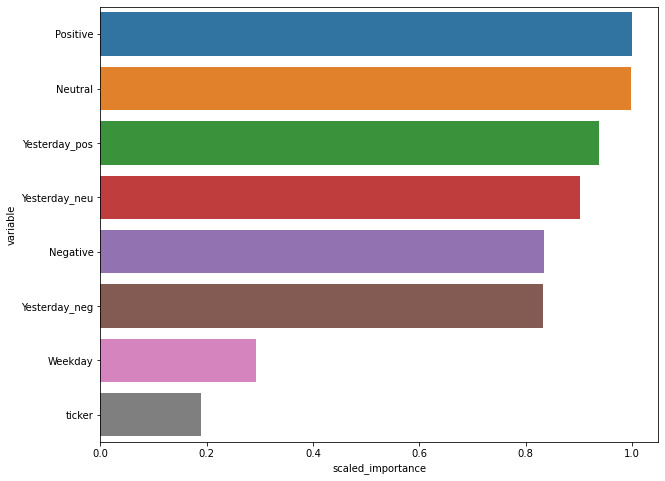

In [346]:
# Feature importance
importance = model.varimp(use_pandas=True)

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='scaled_importance', y='variable', data=importance)
plt.show()

In [347]:
# Make predictions
train_true = train.as_data_frame()['Price_change'].values
test_true = test.as_data_frame()['Price_change'].values
train_pred = model.predict(train).as_data_frame()['p1'].values
test_pred = model.predict(test).as_data_frame()['p1'].values

train_fpr, train_tpr, _ = roc_curve(train_true, train_pred)
test_fpr, test_tpr, _ = roc_curve(test_true, test_pred)
train_auc = np.round(auc(train_fpr, train_tpr), 3)
test_auc = np.round(auc(test_fpr, test_tpr), 3)

drf prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


In [348]:
# Classification report
print(classification_report(y_true=test_true, y_pred=(test_pred > 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.54      0.55      0.54       117
           1       0.57      0.56      0.56       125

    accuracy                           0.55       242
   macro avg       0.55      0.55      0.55       242
weighted avg       0.55      0.55      0.55       242



In [342]:
# Shutdown h2o instance
h2o.cluster().shutdown()

H2O session _sid_8c1c closed.
